# Logistic Regression

## Importing the libraries

In [363]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [364]:
dataset = pd.read_csv('C:/Users/Asus/Desktop/New folder/PCOS_data.csv')


In [365]:
dataset.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [366]:
dataset=dataset.dropna()

In [367]:
columns_to_remove=['AMH(ng/mL)','II    beta-HCG(mIU/mL)','Marraige Status (Yrs)','Hip(inch)','Waist(inch)','TSH (mIU/L)','PRL(ng/mL)','Vit D3 (ng/mL)','PRG(ng/mL)','RBS(mg/dl)']
dataset=dataset.drop(columns_to_remove,axis=1)

In [368]:
for column in dataset:
  columnSeriesObj=dataset[column]
  dataset[column]=pd.to_numeric(dataset[column],errors='coerce')

In [369]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  539 non-null    int64  
 1   Patient File No.        539 non-null    int64  
 2   PCOS (Y/N)              539 non-null    int64  
 3    Age (yrs)              539 non-null    int64  
 4   Weight (Kg)             539 non-null    float64
 5   Height(Cm)              539 non-null    float64
 6   BMI                     539 non-null    float64
 7   Blood Group             539 non-null    int64  
 8   Pulse rate(bpm)         539 non-null    int64  
 9   RR (breaths/min)        539 non-null    int64  
 10  Hb(g/dl)                539 non-null    float64
 11  Cycle(R/I)              539 non-null    int64  
 12  Cycle length(days)      539 non-null    int64  
 13  Pregnant(Y/N)           539 non-null    int64  
 14  No. of abortions        539 non-null    in

In [370]:
dataset.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,270.862709,270.862709,0.326531,31.430427,59.637291,156.471792,24.311688,13.801484,73.252319,19.237477,...,0.491651,0.515770,0.246753,114.641929,76.935065,6.116883,6.643785,15.018182,15.449666,8.472115
std,156.320611,156.320611,0.469380,5.414105,11.041874,6.039703,4.060444,1.843182,4.437858,1.687260,...,0.500395,0.500215,0.431522,7.391079,5.574892,4.223240,4.444538,3.565130,3.319807,2.166571
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.500000,135.500000,0.000000,28.000000,52.000000,152.000000,21.650000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,405.500000,405.500000,1.000000,35.000000,65.000000,160.000000,26.650000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [371]:
dataset.corr()           

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
Sl. No,1.000000,1.000000,0.057103,0.064347,-0.085105,-0.013434,-0.084477,-0.000333,-0.044373,-0.014055,...,0.162282,0.156796,0.003755,0.012799,0.006917,0.045382,0.088076,0.286892,0.242051,0.029373
Patient File No.,1.000000,1.000000,0.057103,0.064347,-0.085105,-0.013434,-0.084477,-0.000333,-0.044373,-0.014055,...,0.162282,0.156796,0.003755,0.012799,0.006917,0.045382,0.088076,0.286892,0.242051,0.029373
PCOS (Y/N),0.057103,0.057103,1.000000,-0.172436,0.210280,0.066361,0.198800,0.034244,0.092437,0.038031,...,0.288609,0.381772,0.069481,0.006976,0.035110,0.601445,0.651032,0.129181,0.094268,0.109132
Age (yrs),0.064347,0.064347,-0.172436,1.000000,-0.031582,-0.121124,0.019978,-0.012655,0.045910,0.089509,...,-0.032975,-0.036141,-0.022473,0.073719,0.064234,-0.114631,-0.158918,-0.019878,-0.082276,-0.102392
Weight (Kg),-0.085105,-0.085105,0.210280,-0.031582,1.000000,0.420005,0.901731,0.071601,0.019995,0.045048,...,0.064125,0.163327,-0.065989,0.027661,0.129773,0.172146,0.124867,-0.023849,-0.075312,-0.008622
Height(Cm),-0.013434,-0.013434,0.066361,-0.121124,0.420005,1.000000,-0.006838,0.039981,-0.073801,-0.031093,...,0.063415,0.034226,0.013151,-0.069650,0.010791,0.103583,0.076021,-0.028160,0.058097,-0.054325
BMI,-0.084477,-0.084477,0.198800,0.019978,0.901731,-0.006838,1.000000,0.060562,0.050256,0.063867,...,0.044645,0.159830,-0.078346,0.070578,0.138467,0.142619,0.104741,-0.013727,-0.113067,0.011030
Blood Group,-0.000333,-0.000333,0.034244,-0.012655,0.071601,0.039981,0.060562,1.000000,0.047719,-0.023064,...,0.039513,-0.033894,0.066375,0.030656,0.052467,0.059100,0.014495,-0.038032,-0.017647,-0.014156
Pulse rate(bpm),-0.044373,-0.044373,0.092437,0.045910,0.019995,-0.073801,0.050256,0.047719,1.000000,0.305751,...,-0.004072,0.059328,-0.038395,-0.024781,0.007275,0.041366,0.049045,-0.048481,-0.034087,-0.040805
RR (breaths/min),-0.014055,-0.014055,0.038031,0.089509,0.045048,-0.031093,0.063867,-0.023064,0.305751,1.000000,...,0.033174,0.136502,-0.052550,0.014582,0.056182,0.069396,0.012541,-0.028715,-0.020636,-0.067545


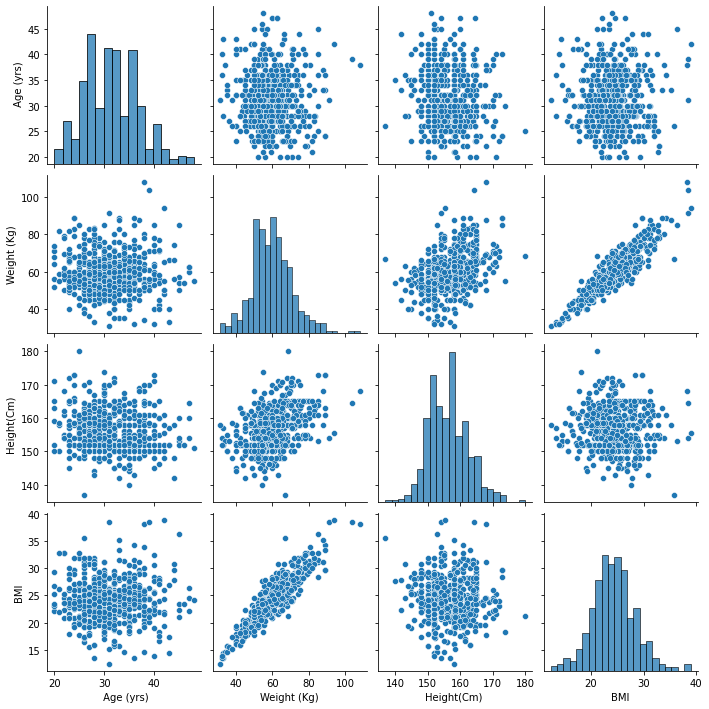

In [372]:
sns.pairplot(dataset.iloc[:,3:7])

<AxesSubplot:xlabel=' Age (yrs)', ylabel='BMI'>

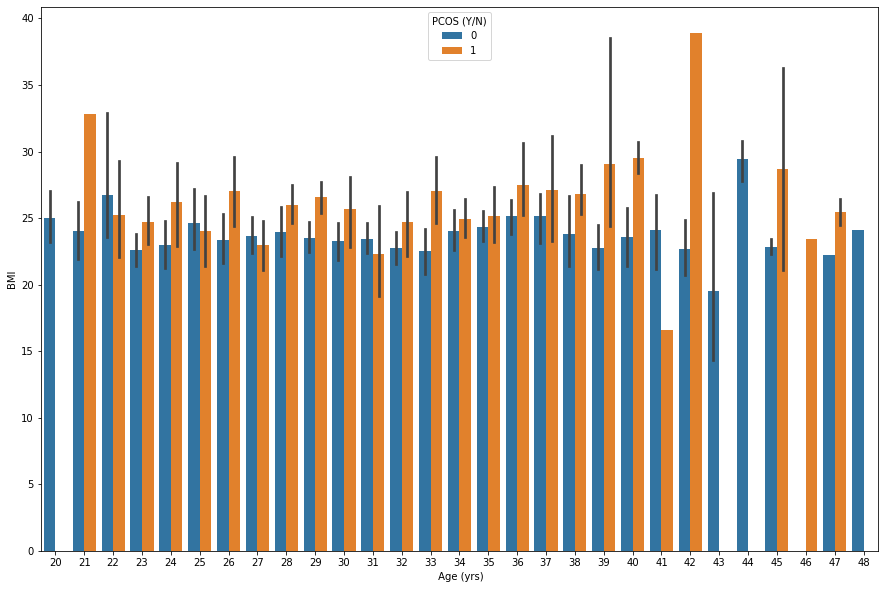

In [373]:
plt.subplots(figsize=(15,10))
sns.barplot(x=' Age (yrs)',y='BMI',hue='PCOS (Y/N)',data=dataset)

In [374]:
X = dataset.iloc[:,3:36].values
y = dataset.iloc[:, 2].values

## Splitting the dataset into the Training set and Test set

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 67)

In [376]:
print(X_train)

[[ 35.   68.  154.  ...  18.   17.    9. ]
 [ 29.   52.  147.  ...  16.   19.    8. ]
 [ 26.   78.  159.  ...  16.   18.    8.5]
 ...
 [ 34.   64.2 155.  ...  16.   17.    7.6]
 [ 33.   58.5 159.  ...  15.   18.    7.1]
 [ 35.   61.  158.  ...  19.   18.    8.2]]


In [377]:
print(y_train)

[0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1
 0 0 0 1 0 0 1]


In [378]:
print(X_test)

[[ 24.   60.  170.  ...  12.   13.5   9.6]
 [ 28.   74.3 154.  ...  14.   13.    8.5]
 [ 22.   79.  155.  ...  16.   15.   13.4]
 ...
 [ 25.   74.  152.  ...  20.   21.    8. ]
 [ 29.   52.  157.  ...  18.   17.   11. ]
 [ 32.   40.  156.  ...  14.   14.    7.3]]


In [379]:
print(y_test)

[0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 0]


## Feature Scaling

In [380]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training the Logistic Regression model on the Training set

In [381]:
def models(X_train,Y_train):
  #Logistic regression
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  #random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=6)
  forest.fit(X_train,y_train)

  return classifier,forest

In [382]:
model=models(X_train,y_train)

In [383]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'#LOGISTIC CLASSIFIER')
logistic_train_acc = accuracy_score(y_train, model[0].predict(X_train))
logistic_test_acc = accuracy_score(y_test, model[0].predict(X_test))

print(confusion_matrix(y_test,model[0].predict(X_test)))
print(classification_report(y_test,model[0].predict(X_test)))

print(f"Test accuracy of  Logistic classifier is : {logistic_test_acc}")

print(f'#RANDOM FOREST CLASSIFIER')
rfc_train_acc = accuracy_score(y_train, model[-1].predict(X_train))
rfc_test_acc = accuracy_score(y_test, model[-1].predict(X_test))

print(confusion_matrix(y_test,model[-1].predict(X_test)))
print(classification_report(y_test,model[-1].predict(X_test)))

print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

#LOGISTIC CLASSIFIER
[[98 12]
 [13 39]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.76      0.75      0.76        52

    accuracy                           0.85       162
   macro avg       0.82      0.82      0.82       162
weighted avg       0.84      0.85      0.85       162

Test accuracy of  Logistic classifier is : 0.845679012345679
#RANDOM FOREST CLASSIFIER
[[105   5]
 [  9  43]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       110
           1       0.90      0.83      0.86        52

    accuracy                           0.91       162
   macro avg       0.91      0.89      0.90       162
weighted avg       0.91      0.91      0.91       162

Test accuracy of Random Forest Classifier is : 0.9135802469135802
